In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [9]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [10]:
#Upgraded Model

i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPool2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPool2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPool2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [3]:
'''
# Build the model using the functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)'''


"\n# Build the model using the functional API\ni = Input(shape = x_train[0].shape)\nx = Conv2D(32, (3,3), strides=2, activation='relu')(i)\nx = Conv2D(64, (3,3), strides=2, activation='relu')(x)\nx = Conv2D(128, (3,3), strides=2, activation='relu')(x)\nx = Flatten()(x)\nx = Dropout(0.5)(x)\nx = Dense(1024, activation='relu')(x)\nx = Dropout(0.2)(x)\nx = Dense(K, activation='softmax')(x)\n\nmodel = Model(i, x)"

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

In [16]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch= steps_per_epoch,epochs=10)

Epoch 1/10
1562/1562 [==============================] - 690s 442ms/step - loss: 1.3146 - accuracy: 0.5419 - val_loss: 1.1805 - val_accuracy: 0.5879
Epoch 2/10
1562/1562 [==============================] - 688s 441ms/step - loss: 1.2225 - accuracy: 0.5714 - val_loss: 1.0917 - val_accuracy: 0.6249
Epoch 3/10
1562/1562 [==============================] - 699s 448ms/step - loss: 1.1814 - accuracy: 0.5873 - val_loss: 1.1181 - val_accuracy: 0.6254
Epoch 4/10
1562/1562 [==============================] - 703s 450ms/step - loss: 1.1328 - accuracy: 0.6025 - val_loss: 1.0741 - val_accuracy: 0.6359
Epoch 5/10
1562/1562 [==============================] - 708s 453ms/step - loss: 1.0968 - accuracy: 0.6161 - val_loss: 0.9676 - val_accuracy: 0.6674
Epoch 6/10
1562/1562 [==============================] - 701s 449ms/step - loss: 1.0603 - accuracy: 0.6288 - val_loss: 1.0035 - val_accuracy: 0.6527
Epoch 7/10
1562/1562 [==============================] - 699s 447ms/step - loss: 1.0376 - accuracy: 0.6374 - val_

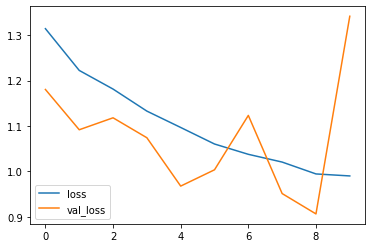

In [17]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

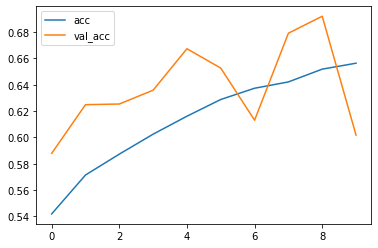

In [18]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion Matrix, without Normalization
[[589  28  62  21  68   5  91   7  92  37]
 [  4 811   5   5   5   0  55   4  18  93]
 [ 40   5 383  27 144  29 351  11   5   5]
 [  4  10  30 278 129  74 444  17   4  10]
 [  6   3  25  21 603   2 325  10   4   1]
 [  4   3  38 119 136 339 319  36   2   4]
 [  0   3   5   9   9   3 970   0   0   1]
 [ 10   3  21  24 199  27 154 547   5  10]
 [ 36  46  13  21  28   3  78   2 741  32]
 [ 17  95   6  15  15   2  63   9  21 757]]


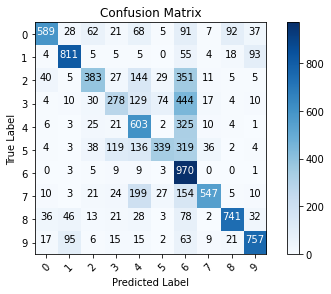

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize= False, title='Confusion Matrix', cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without Normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [20]:
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

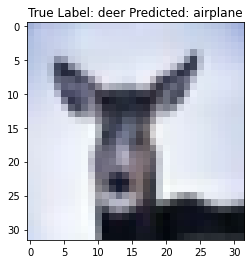

In [21]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True Label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));